In [54]:
base_dir = "/kaggle/input/rice-image-dataset/Rice_Image_Dataset"

!pip install split-folders

import splitfolders

if not os.path.exists("output"):
    splitfolders.ratio(base_dir, output="output", seed=1337, ratio=(.8, .1, .1), move=False)

output_dir = "output"
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")

print("Train directory:", train_dir)
print("Validation directory:", val_dir)
print("Test directory:", test_dir)


Train directory: output/train
Validation directory: output/val
Test directory: output/test


In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(250, 250),
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    batch_size=32)

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size=(250, 250),
                                                        color_mode='rgb',
                                                        class_mode='categorical',
                                                        batch_size=32)


Found 60000 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


In [56]:
from keras.utils import image_dataset_from_directory

BATCH_SIZE = 128
IMAGE_SIZE = 250

train_ds = image_dataset_from_directory(train_dir,
                                        seed=123,
                                        image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                        batch_size=BATCH_SIZE)

validation_ds = image_dataset_from_directory(val_dir,
                                             seed=123,
                                             image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                             batch_size=BATCH_SIZE)

class_names = train_ds.class_names
print(class_names)


Found 60000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [58]:
from keras.layers import Rescaling

normalization_layer = Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))

image_batch_train, labels_batch_train = next(iter(train_ds))
first_image_train = image_batch_train[0]

image_batch_val, labels_batch_val = next(iter(validation_ds))
first_image_val = image_batch_val[0]

print("Train scale:", np.min(first_image_train), np.max(first_image_train))
print("Validation scale:", np.min(first_image_val), np.max(first_image_val))


Train scale: 0.0 0.0039061904
Validation scale: 0.0 0.003921569


In [75]:
from keras.utils import image_dataset_from_directory

BATCH_SIZE = 128
IMAGE_SIZE = 250

train_ds = image_dataset_from_directory(train_dir,
                                        seed=123,
                                        image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                        batch_size=BATCH_SIZE)

validation_ds = image_dataset_from_directory(val_dir,
                                             seed=123,
                                             image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                             batch_size=BATCH_SIZE)

class_names = train_ds.class_names
print(class_names)


Found 60000 files belonging to 5 classes.
Found 7500 files belonging to 5 classes.


In [76]:
from keras.layers import Rescaling

normalization_layer = Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
validation_ds = validation_ds.map(lambda x, y: (normalization_layer(x), y))

image_batch_train, labels_batch_train = next(iter(train_ds))
first_image_train = image_batch_train[0]

image_batch_val, labels_batch_val = next(iter(validation_ds))
first_image_val = image_batch_val[0]

print("Train scale:", np.min(first_image_train), np.max(first_image_train))
print("Validation scale:", np.min(first_image_val), np.max(first_image_val))


Train scale: 0.0 1.0
Validation scale: 0.0 1.0


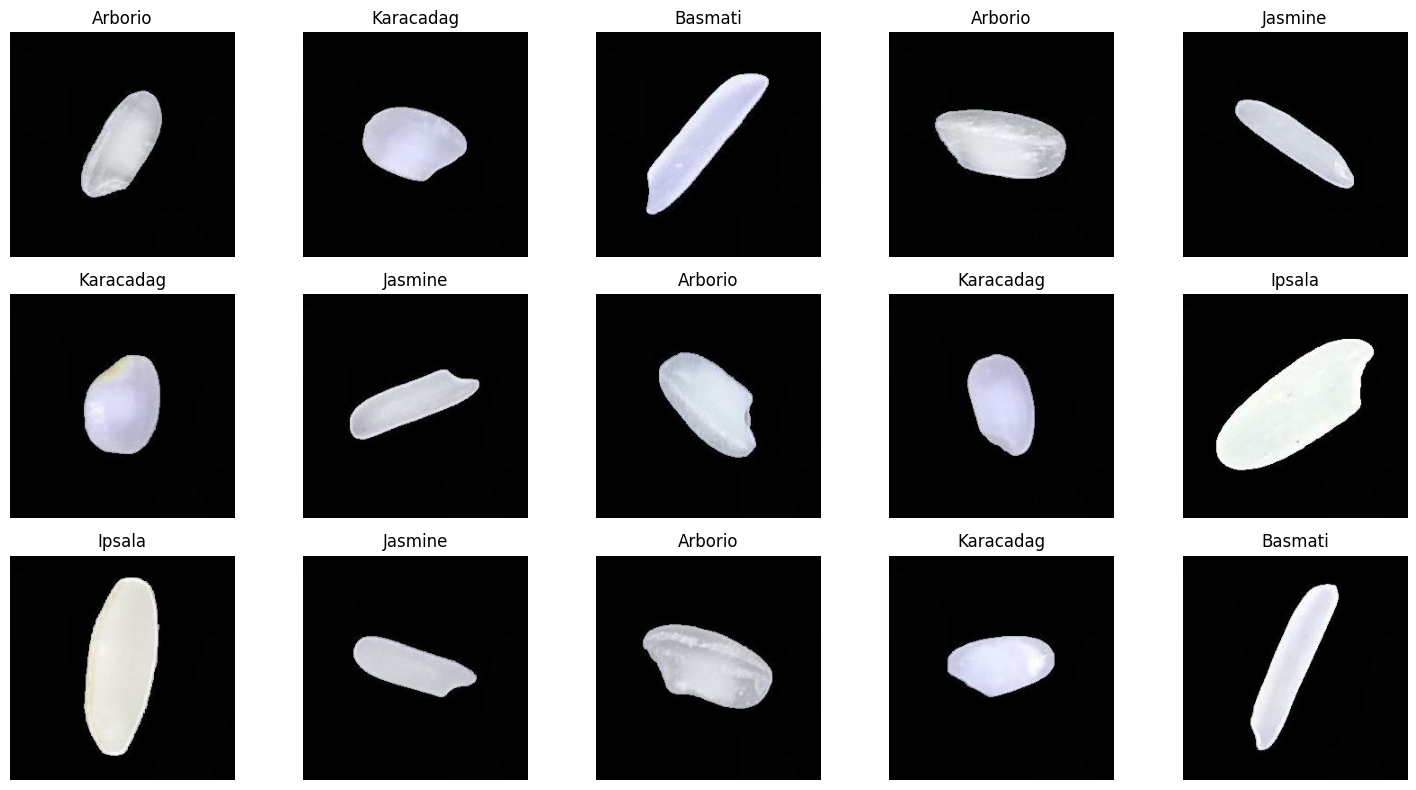

In [77]:
fig, axes = plt.subplots(3, 5, figsize=(15, 8))

for images, labels in train_ds.take(1):
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(images[i].numpy())  
        ax.set_title(class_names[labels[i].numpy()])  
        ax.axis("off")

plt.tight_layout()
plt.show()

In [78]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model_base = Sequential(name="base_model")

model_base.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model_base.add(layers.MaxPooling2D((2, 2)))
model_base.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_base.add(layers.MaxPooling2D((2, 2)))
model_base.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_base.add(layers.MaxPooling2D((2, 2)))
model_base.add(layers.Flatten())
model_base.add(layers.Dense(32, activation='relu'))
model_base.add(layers.Dense(5, activation='softmax'))

model_base.summary()


Model: "base_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 248, 248, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 124, 124, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 59, 59, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 107648)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │       3,444,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,538,181 (13.50 MB)

 Trainable params: 3,538,181 (13.50 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model_base.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   metrics=["acc"])

EPOCHS = 20

history_base = model_base.fit(train_ds, validation_data=validation_ds, epochs=EPOCHS)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 192ms/step - acc: 0.9080 - loss: 0.2438 - val_acc: 0.9852 - val_loss: 0.0459
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 193ms/step - acc: 0.9847 - loss: 0.0470 - val_acc: 0.9861 - val_loss: 0.0418
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 195ms/step - acc: 0.9921 - loss: 0.0255 - val_acc: 0.9919 - val_loss: 0.0238
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 196ms/step - acc: 0.9934 - loss: 0.0214 - val_acc: 0.9937 - val_loss: 0.0207
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 198ms/step - acc: 0.9933 - loss: 0.0205 - val_acc: 0.9909 - val_loss: 0.0310
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 197ms/step - acc: 0.9949 - loss: 0.0164 - val_acc: 0.9967 - val_loss: 0.0135
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 198ms/step - acc: 0.9968 - loss: 0.0099 - val_acc: 0.9917 - val_loss: 0.0285
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 93s 197ms/step - acc: 0.9946 - loss: 0.0144 - val_acc: 0.9952 - val_loss: 0.0180
Epoch 9/20
469/469 ━━━━━━━━━━━━━

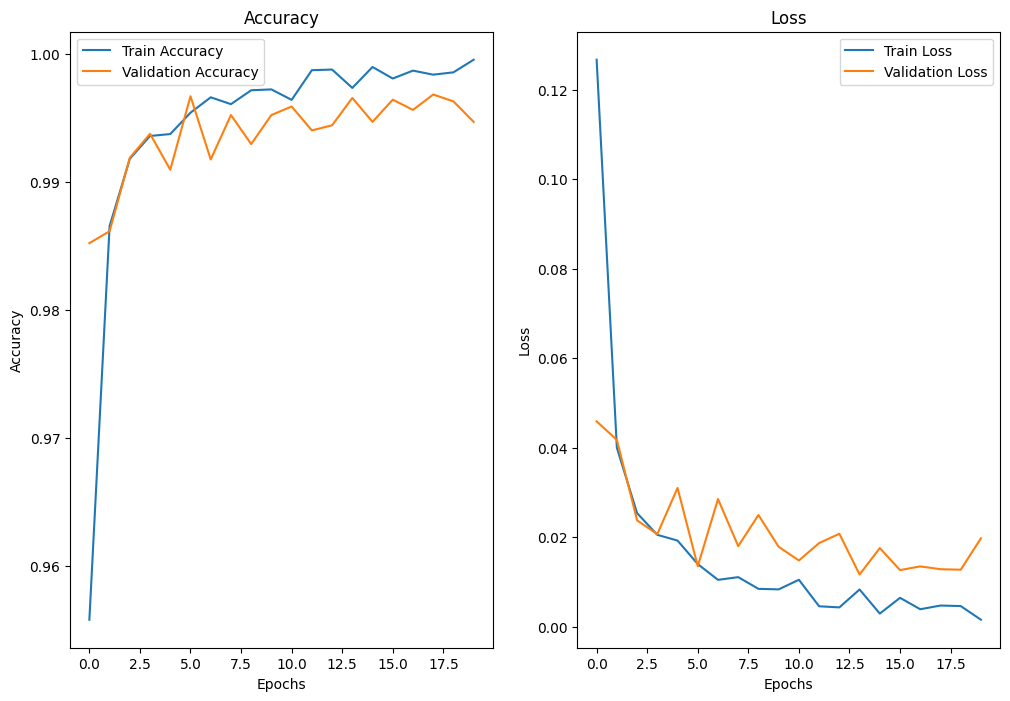

In [80]:
def plot_results(acc, val_acc, loss, val_loss):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8))

    ax[0].plot(acc, label="Train Accuracy")
    ax[0].plot(val_acc, label="Validation Accuracy")
    ax[0].set_title("Accuracy")
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend()

    ax[1].plot(loss, label="Train Loss")
    ax[1].plot(val_loss, label="Validation Loss")
    ax[1].set_title("Loss")
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")
    ax[1].legend()

    plt.show()

plot_results(history_base.history['acc'],
             history_base.history['val_acc'],
             history_base.history['loss'],
             history_base.history['val_loss'])


In [81]:
test_ds = image_dataset_from_directory(test_dir,
                                       seed=123,
                                       image_size=(IMAGE_SIZE, IMAGE_SIZE),
                                       batch_size=BATCH_SIZE)

test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

model_base.evaluate(test_ds)


Found 7500 files belonging to 5 classes.
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.9960 - loss: 0.0125


[0.01755818910896778, 0.9958666563034058]